# Automated Forcasting Analysis for Multiple Time Series  

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
%load_ext watermark

In [82]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [44]:
# from tqdm import tqdm

from glob import glob

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 12, 8 # 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.grid'] = True
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# import seaborn as sns
# sns.set_theme()

# pd.set_option("max_columns", None)
# pd.set_option("max_rows", None)
# pd.set_option('display.max_colwidth', None)

# from IPython.display import Markdown, display
# def md(arg):
#     display(Markdown(arg))

# from pandas_profiling import ProfileReport
# #report = ProfileReport(#DataFrame here#, minimal=True)
# #report.to

# import pyarrow.parquet as pq
# #df = pq.ParquetDataset(path_to_folder_with_parquets, filesystem=None).read_pandas().to_pandas()

# import json
# def open_file_json(path,mode='r',var=None):
#     if mode == 'w':
#         with open(path,'w') as f:
#             json.dump(var, f)
#     if mode == 'r':
#         with open(path,'r') as f:
#             return json.load(f)

# import functools
# import operator
# def flat(a):
#     return functools.reduce(operator.iconcat, a, [])

# import json
# from glob import glob
# from typing import NewType


# DictsPathType = NewType("DictsPath", str)


# def open_file_json(path):
#     with open(path, "r") as f:
#         return json.load(f)

# class LoadDicts:
#     def __init__(self, dict_path: DictsPathType = "./data"):
#         Dicts_glob = glob(f"{dict_path}/*.json")
#         self.List = []
#         self.Dict = {}
#         for path_json in Dicts_glob:
#             name = path_json.split("/")[-1].replace(".json", "")
#             self.List.append(name)
#             self.Dict[name] = open_file_json(path_json)
#             setattr(self, name, self.Dict[name])


In [4]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v
!cat /proc/cpuinfo |grep 'model name'|head -n 1 |sed -e 's/model\ name/CPU/'
!free -h |cut -d'i' -f1  |grep -v total

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 7.25.0

Compiler    : GCC 8.3.0
OS          : Linux
Release     : 5.11.0-7620-generic
Machine     : x86_64
Processor   : 
CPU cores   : 4
Architecture: 64bit

Git hash: e9ed9407e0fdb41b20afa2cfe311fb26c3fd7bc9

Git repo: https://github.com/ysraell/forecasting.git

Git branch: main

pandas: 1.3.1

CPU	: Intel(R) Core(TM) i7-7500U CPU @ 2.70GHz
Mem:           15G
Swap:         4.0G


In [5]:
coins_dataset_path = '/work/data/coins'
df = pd.concat([pd.read_csv(csv, parse_dates=True) for csv in glob(f'{coins_dataset_path}/*csv')], ignore_index=True)
df['Date'] = pd.to_datetime(df.Date)
Coins = df.Symbol.unique().tolist()
df_results = pd.read_csv("/work/tmp/results_coin.csv")

# vide import matplotlib.colors as mcolors; mcolors.TABLEAU_COLORS
col2color = {
    'High':'red',
    'Low':'gray', 
    'Open':'orange',
    'Close':'blue', 
    'Volume':'green',
    'Marketcap':'olive'
}
linestyle = {
    'High':':',
    'Low':':', 
    'Open':'--',
    'Close':'-', 
    'Volume':'-',
    'Marketcap':'-'
}
price_cols = ['High', 'Low', 'Open', 'Close']
other_cols = ['Volume', 'Marketcap']
cols2decomposed = ['Close']
modes2decomposed = ['additive', 'multiplicative']

In [6]:
df_results

,index,sty_diff_order,r_y_energy_rel,t_y_energy_rel,s_y_energy_rel,t_strength,s_strength,spc_H,r_acf_energy,r_pacf_energy,model
0,MIOTA,1,0.253155,0.638982,0.207894,0.643149,0.174798,0.519886,5.674886,4.401336,additive
1,MIOTA,1,0.975794,0.638982,1.375038,0.728507,0.217932,0.519886,5.988207,4.308760,multiplicative
2,USDC,1,0.000791,0.638408,0.003378,0.404224,0.895131,0.652492,6.868832,7.394259,additive
3,USDC,1,0.636341,0.638408,0.996345,0.407075,0.895294,0.652492,6.872003,7.385872,multiplicative
4,SOL,1,0.636341,0.638408,0.996345,0.407075,0.895294,0.370972,6.872003,7.385872,additive
5,SOL,1,0.636341,0.638408,0.996345,0.407075,0.895294,0.370972,6.872003,7.385872,multiplicative
6,WBTC,1,0.109781,0.459921,0.103088,0.662715,0.353877,0.334266,NaN,NaN,additive
7,WBTC,1,0.000031,0.459921,0.000059,1.000000,0.435225,0.334266,NaN,NaN,multiplicative
8,TRX,0,0.126989,0.611009,0.157289,0.593275,0.417083,0.611922,7.933538,5.026233,additive
9,TRX,0,21.627982,0.611009,30.701757,0.005502,0.477937,0.611922,7.898475,5.148174,multiplicative


In [38]:
coin = 'BTC'

col_target = 'Close'
df_tmp = df.query(f'Symbol == "{coin}"').set_index('Date')[col_target].resample('W').mean()
dataset = {
    'YTD' : {
        'test' : df_tmp.loc['2020-07-02':'2021-07-11'],
        'train' : df_tmp.loc['2018-07-01':'2020-07-01']
    },
    '3MTD' : {
        'test' : df_tmp.loc['2021-04-02':'2021-07-11'],
        'train' : df_tmp.loc['2020-04-2':'2021-04-01']
    }
}

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  105
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -815.519
Date:                Sat, 07 Aug 2021   AIC                           1643.039
Time:                        00:37:55   BIC                           1658.905
Sample:                    07-01-2018   HQIC                          1649.467
                         - 06-28-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2368      0.099      2.393      0.017       0.043       0.431
ar.L2         -0.0289      0.088     -0.327      0.743      -0.202       0.144
ar.L3         -0.1071      0.080     -1.345      0.1

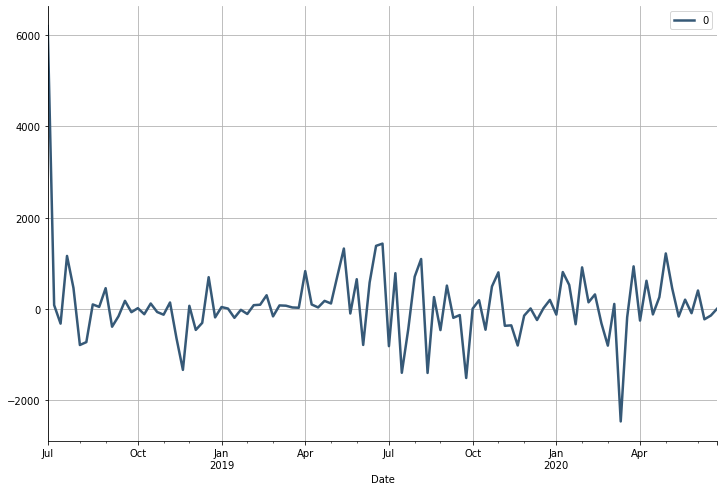

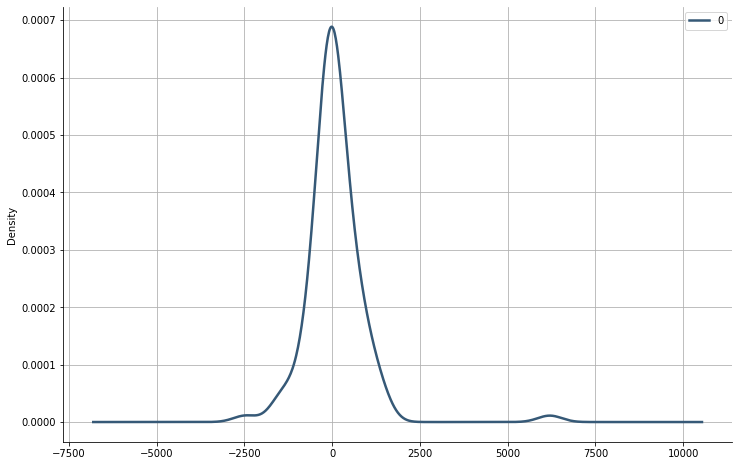

                 0
count   105.000000
mean     80.848320
std     861.399433
min   -2469.883569
25%    -197.517734
50%      23.551278
75%     316.049143
max    6201.648507


In [46]:
series = dataset['YTD']['train']

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

In [78]:
series_test = dataset['YTD']['test']
model_fit.forecast(series_test.shape[0])

2020-07-05    9371.633603
2020-07-12    9374.507823
2020-07-19    9366.156149
2020-07-26    9353.905696
2020-08-02    9360.068164
2020-08-09    9361.384018
2020-08-16    9361.772165
2020-08-23    9360.001476
2020-08-30    9360.521850
2020-09-06    9360.617822
2020-09-13    9360.819720
2020-09-20    9360.591628
2020-09-27    9360.636342
2020-10-04    9360.627029
2020-10-11    9360.668436
2020-10-18    9360.641045
2020-10-25    9360.646564
2020-11-01    9360.641771
2020-11-08    9360.648501
2020-11-15    9360.645191
2020-11-22    9360.646209
2020-11-29    9360.645099
2020-12-06    9360.646089
2020-12-13    9360.645656
2020-12-20    9360.645863
2020-12-27    9360.645659
2021-01-03    9360.645800
2021-01-10    9360.645736
2021-01-17    9360.645776
2021-01-24    9360.645742
2021-01-31    9360.645763
2021-02-07    9360.645752
2021-02-14    9360.645760
2021-02-21    9360.645754
2021-02-28    9360.645757
2021-03-07    9360.645756
2021-03-14    9360.645757
2021-03-21    9360.645756
2021-03-28  

In [64]:
model_filter = model.filter(model_fit.params)

In [65]:
model_filter

In [67]:
# In-sample one-step-ahead predictions
predict = model_filter.get_prediction()
predict_ci = predict.conf_int()

In [69]:
predict_ci

,lower Close,upper Close
Date,,
2018-07-01,-2318.573832,2318.573832
2018-07-08,5357.399908,7817.888038
2018-07-15,5482.859135,7899.841740
2018-07-22,4932.349231,7345.123973
2018-07-29,6460.766467,8863.751915
...,...,...
2020-05-31,8192.852242,10584.312998
2020-06-07,8150.091892,10541.552647
2020-06-14,8620.017600,11011.478356


In [73]:
# Dynamic predictions
predict_dy = model_filter.get_prediction(dynamic='2020-05-31')
predict_dy_ci = predict_dy.conf_int()

In [74]:
predict_dy_ci

,lower Close,upper Close
Date,,
2018-07-01,-2318.573832,2318.573832
2018-07-08,5357.399908,7817.888038
2018-07-15,5482.859135,7899.841740
2018-07-22,4932.349231,7345.123973
2018-07-29,6460.766467,8863.751915
...,...,...
2020-05-31,8192.852242,10584.312998
2020-06-07,7562.522894,11366.137204
2020-06-14,7010.867502,11869.252990


predicted=9371.633603, expected=9139.188334
predicted=9087.765469, expected=9304.243900
predicted=9340.724482, expected=9186.877366
predicted=9169.212107, expected=9537.818255
predicted=9587.186148, expected=11178.864565
predicted=11606.386874, expected=11572.899379
predicted=11560.404986, expected=11740.726032
predicted=11648.688597, expected=11831.636138
predicted=11975.072535, expected=11530.480380
predicted=11425.642308, expected=10896.051779
predicted=10736.339663, expected=10324.772613
predicted=10228.685130, expected=10911.269514
predicted=11107.794929, expected=10603.668980
predicted=10520.178069, expected=10679.017590
predicted=10630.211814, expected=10961.057282
predicted=11135.553443, expected=11438.528970
predicted=11474.158470, expected=12645.532674
predicted=12927.441038, expected=13500.465935
predicted=13672.120708, expected=14727.649653
predicted=14989.054912, expected=15848.919471
predicted=16212.855128, expected=17945.166090
predicted=18638.134195, expected=18051.0900

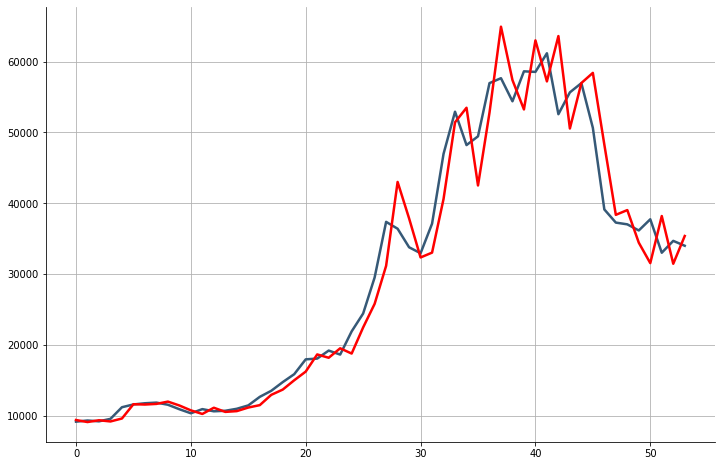

<function matplotlib.pyplot.show(close=None, block=None)>

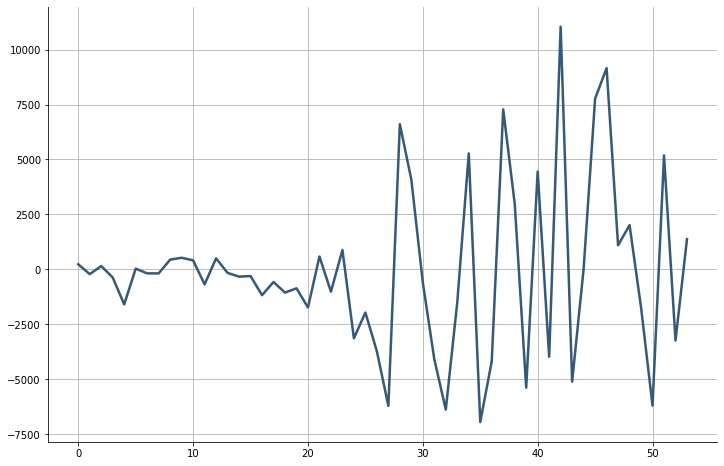

In [86]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# split into train and test sets
train = series.values
test = series_test.values
history = [x for x in train]
predictions = []
error = []
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    error.append(yhat-obs)
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
plt.plot(error)
plt.show